## Importing necessary packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist


## Loading the dataset (Training and Testing data)

In [52]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

(28, 28)
5


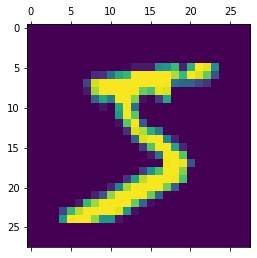

In [47]:
plt.matshow(X_train[0])
print(X_train[0].shape)
print(y_train[0])


## Normalizing the data using the ```normalize``` function in the tensorflow library

In [53]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train.shape

(60000, 28, 28)

## Building the neural network:

*   The flatten function changes the 2d numpy array of pixels of each image into a 1d numpy array which is used by the first  layer as input
*   There are four hidden layers and one output layer in this network details of which are shown below




| Hidden layer | Number of units | Activation Function |
|--------------|-----------------|---------------------|
| 1            | 128             | ReLU                |
| 2            | 256              | ReLU                |
| 3            | 512              | ReLU                |
| 4            | 1024              | ReLU                |

ReLU stands for Rectified Linear Unit



*   The last layer has 10 units corresponding to the probability of each digit and has softmax activation





In [78]:
model = tf.keras.models.Sequential(
    [    
        Flatten(),
        Dense(units = 128, activation = 'relu'),
        Dense(units = 256, activation = 'relu'),
        Dense(units = 512, activation = 'relu'),
        Dense(units = 1024, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
            ]
)


In [82]:
 model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 120)               94200     
                                                                 
 dense_57 (Dense)            (None, 240)               29040     
                                                                 
 dense_58 (Dense)            (None, 480)               115680    
                                                                 
 dense_59 (Dense)            (None, 960)               461760    
                                                                 
 dense_60 (Dense)            (None, 10)                9610      
                                                                 
Total params: 710,290
Trainable params: 710,290
Non-t

In [79]:
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  m_ = model.fit(
    X_train,y_train,
    epochs=25)

Epoch 1/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2419 - accuracy: 0.9260
Epoch 2/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1132 - accuracy: 0.9662
Epoch 3/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0814 - accuracy: 0.9752
Epoch 4/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0553 - accuracy: 0.9828
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0465 - accuracy: 0.9859
Epoch 7/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0399 - accuracy: 0.9879
Epoch 8/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 9/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 10/25
1875/1875 [==============================] - 22s 12m

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9791
0.13911065459251404
0.9790999889373779


#### Accuracy of training set: 99.67 %
#### Accuracy of testing set : 97.91 %

1


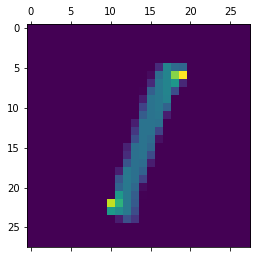

In [81]:
plt.matshow(X_test[5])
print(y_test[5])

In [75]:
predictions= model.predict(X_test)
print(np.argmax(predictions[5]))

313/313 [==============================] - 1s 4ms/step
1
